## Imports

In [20]:
import torch
import torch.nn as nn
import os
import copy
import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt

from config_mx_mbrl.cartpole_qpy2 import CONFIG_MODULE as cartpole_config 
from config_mx_mbrl.pusher_qpy2 import CONFIG_MODULE as pusher_config 
from config_mx_mbrl.reacher_qpy2 import CONFIG_MODULE as reacher_config 
from config_mx_mbrl.halfcheetah_qpy2 import CONFIG_MODULE as halfcheetah_config 


from qtorch.quant import fixed_point_quantize, block_quantize, float_quantize

## Explore different BFP/MX quantizations to different randn distributions and get QSNR

QSNR is 50.314
QSNR is 43.915
QSNR is 47.113
QSNR is 50.975
QSNR is 21.401
QSNR is 16.208
QSNR is 19.302
QSNR is 23.107


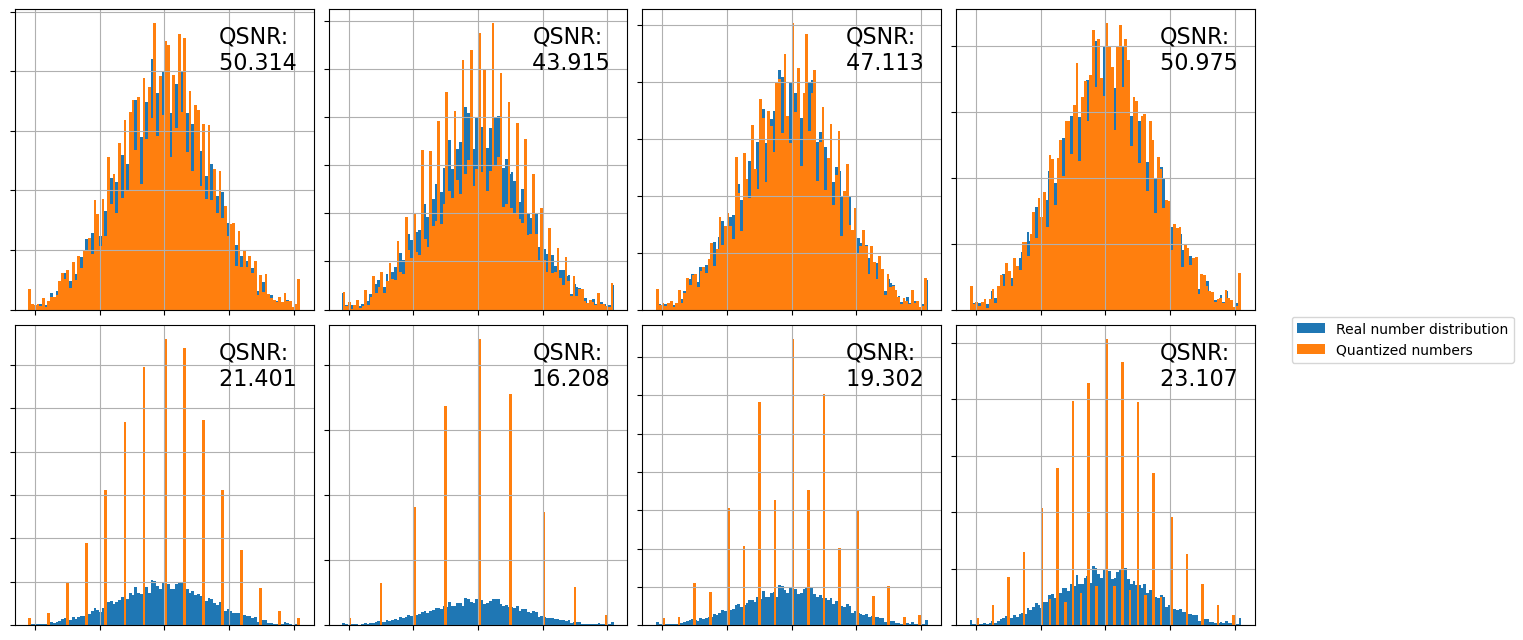

In [14]:
def int_quant(x, wl=8):
    x_max = x.max()
    xscale = x_max/(2**(wl-1)-1)
    xq = (x/xscale).round_()
    return xq*xscale

def calc_qsnr(x, q_x):
    return -10*torch.log(torch.norm(x-q_x)/torch.norm(x))

plt.rcParams["figure.figsize"] = (16,8)

# Replace block_quantize function with mx quantization functions from microxcaling for minifloat or mx configurations

eps = 0.05
amp=1.1
y = amp*1/3*torch.randn(1024*8)
y = torch.clip(y,-amp+eps,amp-eps)

fs = 16
wl = 8
plt.subplot(241);
q_y = int_quant(y, wl=wl)
plt.hist(y.flatten().numpy(), bins=100);
plt.hist(q_y.flatten().numpy(), bins=100);
plt.grid()
plt.text(plt.xlim()[1] * 0.6, plt.ylim()[1] * 0.8, f"QSNR:\n {calc_qsnr(y.flatten(), q_y.flatten()):3.3f}", ha='center', fontsize=fs, color='black')
print(f"QSNR is {calc_qsnr(y.flatten(), q_y.flatten()):3.3f}")


plt.subplot(242);
q_y = block_quantize(y, wl=wl, dim=-1, rounding="nearest")
plt.hist(y.flatten().numpy(), bins=100);
plt.hist(q_y.flatten().numpy(), bins=100);
plt.grid()
plt.text(plt.xlim()[1] * 0.6, plt.ylim()[1] * 0.8, f"QSNR:\n {calc_qsnr(y.flatten(), q_y.flatten()):3.3f}", ha='center', fontsize=fs, color='black')

print(f"QSNR is {calc_qsnr(y.flatten(), q_y.flatten()):3.3f}")

plt.subplot(243);
B=64
q_y = block_quantize(y.reshape(-1, B), wl=wl, dim=0, rounding="nearest")
plt.hist(y.flatten().numpy(), bins=100);
plt.hist(q_y.flatten().numpy(), bins=100);
plt.grid()
plt.text(plt.xlim()[1] * 0.6, plt.ylim()[1] * 0.8, f"QSNR:\n {calc_qsnr(y.flatten(), q_y.flatten()):3.3f}", ha='center', fontsize=fs, color='black')

print(f"QSNR is {calc_qsnr(y.flatten(), q_y.flatten()):3.3f}")

plt.subplot(244);
B=8
q_y = block_quantize(y.reshape(-1, B), wl=wl, dim=0, rounding="nearest")
plt.hist(y.flatten().numpy(), bins=100);
plt.hist(q_y.flatten().numpy(), bins=100);
plt.grid()
plt.text(plt.xlim()[1] * 0.6, plt.ylim()[1] * 0.8, f"QSNR:\n {calc_qsnr(y.flatten(), q_y.flatten()):3.3f}", ha='center', fontsize=fs, color='black')

print(f"QSNR is {calc_qsnr(y.flatten(), q_y.flatten()):3.3f}")


wl = 4
plt.subplot(245);
q_y = int_quant(y, wl=wl)
plt.hist(y.flatten().numpy(), bins=100);
plt.hist(q_y.flatten().numpy(), bins=100);
plt.grid()
plt.text(plt.xlim()[1] * 0.6, plt.ylim()[1] * 0.8, f"QSNR:\n {calc_qsnr(y.flatten(), q_y.flatten()):3.3f}", ha='center', fontsize=fs, color='black')

print(f"QSNR is {calc_qsnr(y.flatten(), q_y.flatten()):3.3f}")

plt.subplot(246);
q_y = block_quantize(y, wl=wl, dim=-1, rounding="nearest")
plt.hist(y.flatten().numpy(), bins=100);
plt.hist(q_y.flatten().numpy(), bins=100);
plt.grid()
plt.text(plt.xlim()[1] * 0.6, plt.ylim()[1] * 0.8, f"QSNR:\n {calc_qsnr(y.flatten(), q_y.flatten()):3.3f}", ha='center', fontsize=fs, color='black')

print(f"QSNR is {calc_qsnr(y.flatten(), q_y.flatten()):3.3f}")

plt.subplot(247);
B=64
q_y = block_quantize(y.reshape(-1, B), wl=wl, dim=0, rounding="nearest")
plt.hist(y.flatten().numpy(), bins=100);
plt.hist(q_y.flatten().numpy(), bins=100);
plt.grid()
plt.text(plt.xlim()[1] * 0.6, plt.ylim()[1] * 0.8, f"QSNR:\n {calc_qsnr(y.flatten(), q_y.flatten()):3.3f}", ha='center', fontsize=fs, color='black')

print(f"QSNR is {calc_qsnr(y.flatten(), q_y.flatten()):3.3f}")

plt.subplot(248);
B=8
q_y = block_quantize(y.reshape(-1, B), wl=wl, dim=0, rounding="nearest")
plt.hist(y.flatten().numpy(), bins=100);
plt.hist(q_y.flatten().numpy(), bins=100);
plt.grid()
plt.text(plt.xlim()[1] * 0.6, plt.ylim()[1] * 0.8, f"QSNR:\n {calc_qsnr(y.flatten(), q_y.flatten()):3.3f}", ha='center', fontsize=fs, color='black')

print(f"QSNR is {calc_qsnr(y.flatten(), q_y.flatten()):3.3f}")

for i in range(1,9):
    plt.subplot(2,4,i)
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])
    frame1.axes.yaxis.set_ticklabels([])
    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.05)
plt.legend(['Real number distribution','Quantized numbers'], bbox_to_anchor=(1.1, 1.05))

## Model initializations

In [15]:
def truncated_normal_(
    tensor: torch.Tensor, mean: float = 0, std: float = 1
) -> torch.Tensor:
    """Samples from a truncated normal distribution in-place.

    Args:
        tensor (tensor): the tensor in which sampled values will be stored.
        mean (float): the desired mean (default = 0).
        std (float): the desired standard deviation (default = 1).

    Returns:
        (tensor): the tensor with the stored values. Note that this modifies the input tensor
            in place, so this is just a pointer to the same object.
    """
    torch.nn.init.normal_(tensor, mean=mean, std=std)
    while True:
        cond = torch.logical_or(tensor < mean - 2 * std, tensor > mean + 2 * std)
        bound_violations = torch.sum(cond).item()
        if bound_violations == 0:
            break
        tensor[cond] = torch.normal(
            mean, std, size=(bound_violations,), device=tensor.device
        )
    return tensor


def truncated_normal_init(m: nn.Module):
    """Initializes the weights of the given module using a truncated normal distribution."""

    if isinstance(m, nn.Linear):
        input_dim = m.weight.data.shape[0]
        stddev = 1 / (2 * np.sqrt(input_dim))
        truncated_normal_(m.weight.data, std=stddev)
        m.bias.data.fill_(0.0)
        

## Training script (Adaptive with specified configurations)

In [21]:
# Get training data

weight_lists = {}
weight_lists['cartpole'] = ['2022-09-20--16:54:24',
                         '2022-09-20--16:48:45',
                         '2022-09-20--17:05:48',
                         '2022-09-20--17:00:08',
                         '2022-09-20--17:11:29',
                         ]

weight_lists['pusher'] =    ['2022-09-20--17:11:41',
                       '2022-09-20--18:03:12',
                       '2022-09-20--18:55:21',
                       '2022-09-20--19:47:10',
                       '2022-09-20--20:39:33',
                       ]

weight_lists['reacher'] =   ['2022-09-21--02:59:39',
                        '2022-09-20--22:04:39',
                        '2022-09-21--00:30:23',
                        '2022-09-20--17:09:13',
                        '2022-09-20--19:38:38',
                        ]

weight_lists['halfcheetah'] =  [ '2022-09-21--16:52:24',
                            '2022-09-21--16:53:08',
                            '2022-09-23--09:46:22',
                            '2022-09-24--02:55:44',
                            '2022-09-24--05:29:44'
                               ]



TORCH_DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

task = "cartpole"
# task = "pusher"
# task = "reacher" 
# task = "halfcheetah" 
module_config = reacher_config()
          
if task == "cartpole": 
    module_config = cartpole_config()
elif task == "pusher": 
    module_config = pusher_config()
elif task == "reacher":
    module_config = reacher_config()
elif task == "halfcheetah":
    module_config = halfcheetah_config()
            
        
if hasattr(module_config, "UPDATE_FNS"):
    update_fns = module_config.UPDATE_FNS
else:
    update_fns = lambda obs: obs
if hasattr(module_config, "obs_preproc"):
    obs_preproc = module_config.obs_preproc
else:
    obs_preproc = lambda obs: obs
if hasattr(module_config, "obs_postproc"):
    obs_postproc = module_config.obs_postproc
else:
    obs_postproc = lambda obs, model_out: model_out
if hasattr(module_config, "targ_proc"):
    targ_proc = module_config.targ_proc
else:
    targ_proc = lambda obs, next_obs: next_obs
             
        
        
ind=0
data_path = weight_lists[task][ind]
dat = loadmat(f'../../projects/VLSI-SOC_BSINT_training/{task}_runs_relu_random/{data_path}/logs.mat')

confs = [(8,8,8), (8,1,8)]   # (precision bits, block rows, block columns)
# confs = [(8,1,32), (8,1,32)]   # (precision bits, block rows, block columns)

model_list = {}

loss_stores = {}
loss_stores["adaptive"] = []

# Preprocessing robotics input data to feed into NN
new_train_in, new_train_targs =[], []
for obs, acs in zip(dat['observations'][0:], dat['actions'][0:]):
    new_train_in.append(np.concatenate([obs_preproc(obs[:-1]), acs], axis=-1))
    new_train_targs.append(targ_proc(obs[:-1], obs[1:]))
train_in2 = np.concatenate(new_train_in, axis=0)
train_targs2 = np.concatenate(new_train_targs, axis=0)    

idxs = np.random.randint(train_in2.shape[0], size=[train_in2.shape[0]])
batch_size = 32
num_batch = int(np.ceil(idxs.shape[-1] / batch_size))

# DNN setup
cfg_model = {}
cfg_model["acts_relu"] = True
cfg_model["num_nets"] = 1
cfg_model["model_pretrained"] = False
cfg_model['use_adam']  = True
cfg_model['use_adam_8bit']  = False
cntr = 0

# Split of adaptive training configurations
# epochs = [20, 80]
# epochs = [80, 20]
epochs = [95, 5]

# Main training loop. Outer - Different configurations. Inner - Across different epochs
for index, configs in enumerate(confs):
    batch_size = 32
    epoch_conf = epochs[index]//2 if task=="halfcheetah" else epochs[index]
    num_batch = int(np.ceil(idxs.shape[-1] / batch_size))
    cfg_model["q_specs"] = {}
    cfg_model["q_specs"]['mantissa_bits']  = configs[0]
    cfg_model["q_specs"]['blk_rows']  = configs[1]
    cfg_model["q_specs"]['blk_cols']  = configs[2]
    cfg_model["q_specs"]['rounding']  = "nearest"
     
    model = module_config.nn_constructor(cfg_model).to(TORCH_DEVICE)
    if index==0:
        model.apply(truncated_normal_init)
        model.fit_input_stats(train_in2)
    else:
        saved_weights = loss_stores[f"weights_adaptive_{index-1}"]
        saved_weights["inputs_mu"]  = torch.nn.Parameter(saved_weights["inputs_mu"].squeeze())
        saved_weights["inputs_sigma"]  = torch.nn.Parameter(saved_weights["inputs_sigma"].squeeze())
        model.load_state_dict(saved_weights, strict=False)
        
    for _ in range(epoch_conf):
        cntr +=1
        batch_ave_loss = []
        print(cntr, end="  ")
        for batch_num in range(num_batch):
            batch_idxs = idxs[batch_num * batch_size : (batch_num + 1) * batch_size]
            train_in = torch.from_numpy(train_in2[batch_idxs]).to(TORCH_DEVICE).float()
            train_targ = torch.from_numpy(train_targs2[batch_idxs]).to(TORCH_DEVICE).float()

            loss = 0.01 * (model.max_logvar.sum() - model.min_logvar.sum())
            mean, logvar = model(train_in, ret_logvar=True)
            inv_var = torch.exp(-logvar)
            train_losses = ((mean - train_targ) ** 2) * inv_var + logvar
            train_losses = train_losses.mean(-1).sum()
            loss += train_losses
            model.optim.zero_grad()
            loss.backward()
            model.optim.step()
            batch_ave_loss.append(loss.cpu().data)

        loss_stores["adaptive"].append(np.mean(batch_ave_loss))
    loss_stores[f"weights_adaptive_{index}"] = copy.deepcopy(model.state_dict())


1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99  100  

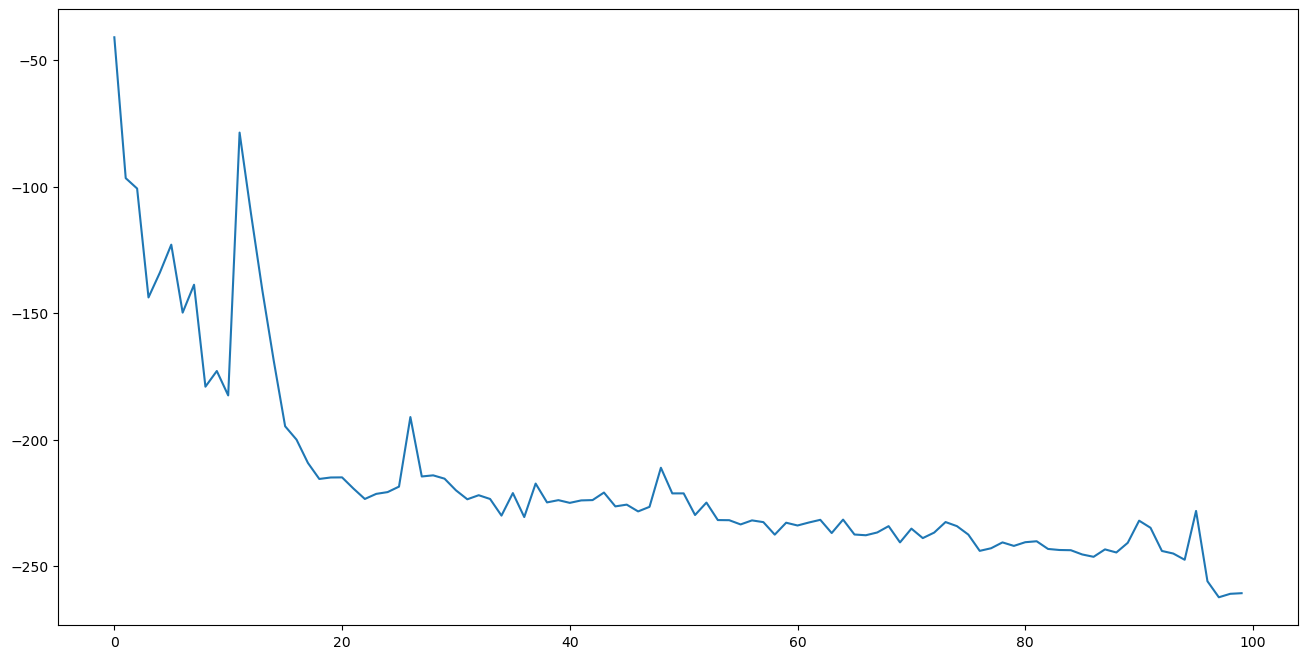

In [22]:
plt.plot(loss_stores["adaptive"])

## Can replace layers with existing model without manually replacing them

In [ ]:
def get_layer(model, name):
    layer = model
    for attr in name.split("."):
        layer = getattr(layer, attr)
    return layer

def set_layer(model, name, layer):
    try:
        attrs, name = name.rsplit(".", 1)
        model = get_layer(model, attrs)
    except ValueError:
        pass
    setattr(model, name, layer)
    

def replace_linear_layers(model, quantized=True, q_specs={}):
    for name, module in model.named_modules():
        if isinstance(module, nn.Linear):
            linear = get_layer(model, name)
            # Create new in layer, conv.bias is a tensor or None, bias needs to be bool
            b = False if linear.bias is None else True
            
            if quantized:
                new_linear = QPyLinear(linear.in_features, linear.out_features, bias=b, q_specs=q_specs)  
            else:
                new_linear = nn.Linear(linear.in_features, linear.out_features, bias=b)  

            with torch.no_grad():
                new_linear.weight.copy_(linear.weight)
                if b: 
                    new_linear.bias.copy_(linear.bias)
            set_layer(model, name, new_linear)